In [1]:
import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 데이터 준비
DATA_ZIP_PATH = '/Users/mungeonhui/git/AI_model/dacon/2023전력사용량예측AI경진대회/open.zip'

assert os.path.exists(DATA_ZIP_PATH)

!unzip '/Users/mungeonhui/git/AI_model/dacon/2023전력사용량예측AI경진대회/open.zip' -d './open'

Archive:  /Users/mungeonhui/git/AI_model/dacon/2023전력사용량예측AI경진대회/open.zip
replace ./open/building_info.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [3]:
DATA_DIR = '/Users/mungeonhui/git/AI_model/dacon/2023전력사용량예측AI경진대회/open'
train_path = os.path.join(DATA_DIR, 'train.csv')
test_path = os.path.join(DATA_DIR, 'test.csv')
building_info_path = os.path.join(DATA_DIR, 'building_info.csv')

In [4]:
train_set = pd.read_csv(train_path)
test_set = pd.read_csv(test_path)
building_info = pd.read_csv(building_info_path)

train_set.shape, test_set.shape, building_info.shape

((204000, 10), (16800, 7), (100, 7))

In [5]:
train_set.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [6]:
test_set.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77


In [8]:
len(train_set['건물번호'].unique())

100

In [23]:
building_info.head()

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000


In [20]:
train_set['건물번호'].unique().shape
train_total = pd.merge(train_set, building_info, left_on='건물번호', right_on='건물번호')
train_total.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,건물기타,110634.0,39570.0,-,-,-
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,건물기타,110634.0,39570.0,-,-,-
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88,건물기타,110634.0,39570.0,-,-,-
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76,건물기타,110634.0,39570.0,-,-,-
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40,건물기타,110634.0,39570.0,-,-,-


In [37]:
cols = ['태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)']
for col in cols:
    train_total[col] = train_total[col].replace('-', 0).astype('float64')

train_total.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,건물기타,110634.0,39570.0,0.0,0.0,0.0
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,건물기타,110634.0,39570.0,0.0,0.0,0.0
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88,건물기타,110634.0,39570.0,0.0,0.0,0.0
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76,건물기타,110634.0,39570.0,0.0,0.0,0.0
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40,건물기타,110634.0,39570.0,0.0,0.0,0.0


In [38]:
train_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204000 entries, 0 to 203999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(C)          204000 non-null  float64
 4   강수량(mm)        43931 non-null   float64
 5   풍속(m/s)        203981 non-null  float64
 6   습도(%)          203991 non-null  float64
 7   일조(hr)         128818 non-null  float64
 8   일사(MJ/m2)      116087 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
 10  건물유형           204000 non-null  object 
 11  연면적(m2)        204000 non-null  float64
 12  냉방면적(m2)       204000 non-null  float64
 13  태양광용량(kW)      204000 non-null  float64
 14  ESS저장용량(kWh)   204000 non-null  float64
 15  PCS용량(kW)      204000 non-null  float64
dtypes: float64(12), int64(1), object(3)
memory usage: 34.5+ MB


In [40]:
train_total.describe()

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
count,204000.000000,204000.000000,43931.000000,203981.000000,203991.000000,128818.000000,116087.000000,204000.000000,2.040000e+05,2.040000e+05,204000.000000,204000.000000,204000.000000
mean,50.500000,25.543524,2.040830,2.134031,78.716295,0.333637,1.063823,2451.036462,2.608875e+05,1.864032e+05,35.678400,86.561000,31.000000
std,28.866141,3.779523,5.165218,1.358109,15.080108,0.401486,1.001030,2440.648858,1.273550e+06,1.085174e+06,89.696667,431.217345,146.079104
min,1.000000,10.100000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,5.578400e+03,0.000000e+00,0.000000,0.000000,0.000000
25%,25.750000,23.400000,0.000000,1.200000,69.000000,0.000000,0.200000,1085.760000,6.144612e+04,2.318700e+04,0.000000,0.000000,0.000000
50%,50.500000,25.700000,0.100000,2.000000,81.000000,0.100000,0.710000,1766.400000,9.264050e+04,5.582336e+04,0.000000,0.000000,0.000000
75%,75.250000,28.100000,1.300000,2.800000,91.000000,0.700000,1.780000,2970.000000,1.848135e+05,9.915097e+04,31.250000,0.000000,0.000000
max,100.000000,37.100000,92.200000,13.300000,100.000000,1.000000,3.920000,25488.400000,1.287288e+07,1.094194e+07,621.000000,3100.000000,1000.000000


In [41]:
train_total.isnull().sum(axis=0)

num_date_time         0
건물번호                  0
일시                    0
기온(C)                 0
강수량(mm)          160069
풍속(m/s)              19
습도(%)                 9
일조(hr)            75182
일사(MJ/m2)         87913
전력소비량(kWh)            0
건물유형                  0
연면적(m2)               0
냉방면적(m2)              0
태양광용량(kW)             0
ESS저장용량(kWh)          0
PCS용량(kW)             0
dtype: int64

In [44]:
train_total['month'] = train_total['일시'].apply(lambda x : int(x[4:6]))
train_total['day'] = train_total['일시'].apply(lambda x : int(x[6:8]))
train_total['time'] = train_total['일시'].apply(lambda x : int(x[9:11]))

train = train_total.drop(columns=['num_date_time', '일시', '일조(hr)', '일사(MJ/m2)'])

train

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW),month,day,time
0,1,18.6,NaN,0.9,42.0,1085.28,건물기타,110634.00,39570.00,0.0,0.0,0.0,6,1,0
1,1,18.0,NaN,1.1,45.0,1047.36,건물기타,110634.00,39570.00,0.0,0.0,0.0,6,1,1
2,1,17.7,NaN,1.5,45.0,974.88,건물기타,110634.00,39570.00,0.0,0.0,0.0,6,1,2
3,1,16.7,NaN,1.4,48.0,953.76,건물기타,110634.00,39570.00,0.0,0.0,0.0,6,1,3
4,1,18.4,NaN,2.8,43.0,986.40,건물기타,110634.00,39570.00,0.0,0.0,0.0,6,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,23.1,NaN,0.9,86.0,881.04,호텔및리조트,57497.84,40035.23,0.0,0.0,0.0,8,24,19
203996,100,22.4,NaN,1.3,86.0,798.96,호텔및리조트,57497.84,40035.23,0.0,0.0,0.0,8,24,20
203997,100,21.3,NaN,1.0,92.0,825.12,호텔및리조트,57497.84,40035.23,0.0,0.0,0.0,8,24,21
203998,100,21.0,NaN,0.3,94.0,640.08,호텔및리조트,57497.84,40035.23,0.0,0.0,0.0,8,24,22


In [47]:
pd.options.display.float_format = '{:.4f}'.format
train.corr()

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh),연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW),month,day,time
건물번호,1.0000,-0.0045,-0.0002,0.0215,0.0230,-0.1805,-0.1153,-0.1162,-0.0456,-0.1247,-0.1723,-0.0000,0.0000,-0.0000
기온(C),-0.0045,1.0000,-0.0665,0.2202,-0.3899,0.1712,-0.0033,-0.0031,0.0064,0.0111,0.0081,0.4272,0.0695,0.2914
강수량(mm),-0.0002,-0.0665,1.0000,0.0287,0.2715,0.0154,0.0092,0.0091,0.0141,0.0056,0.0061,0.0528,0.0172,0.0389
풍속(m/s),0.0215,0.2202,0.0287,1.0000,-0.2191,0.1100,-0.0550,-0.0538,-0.0504,-0.0037,-0.0126,-0.0864,0.1002,0.1771
습도(%),0.0230,-0.3899,0.2715,-0.2191,1.0000,-0.1295,-0.0201,-0.0205,-0.0008,-0.0470,-0.0492,0.2539,0.1184,-0.2806
전력소비량(kWh),-0.1805,0.1712,0.0154,0.1100,-0.1295,1.0000,0.0135,0.0164,0.0520,-0.0319,-0.0339,0.0558,0.0092,0.0996
연면적(m2),-0.1153,-0.0033,0.0092,-0.0550,-0.0201,0.0135,1.0000,0.9989,-0.0343,-0.0217,-0.0228,0.0000,-0.0000,-0.0000
냉방면적(m2),-0.1162,-0.0031,0.0091,-0.0538,-0.0205,0.0164,0.9989,1.0000,-0.0340,-0.0192,-0.0197,0.0000,-0.0000,-0.0000
태양광용량(kW),-0.0456,0.0064,0.0141,-0.0504,-0.0008,0.0520,-0.0343,-0.0340,1.0000,-0.0126,-0.0180,0.0000,0.0000,-0.0000
ESS저장용량(kWh),-0.1247,0.0111,0.0056,-0.0037,-0.0470,-0.0319,-0.0217,-0.0192,-0.0126,1.0000,0.9697,0.0000,0.0000,-0.0000


In [58]:
prev_cols = list(train.columns)
new_cols = prev_cols[:5] + prev_cols[6:] + [prev_cols[5]]
train = train[new_cols]

['건물번호',
 '기온(C)',
 '강수량(mm)',
 '풍속(m/s)',
 '습도(%)',
 '건물유형',
 '연면적(m2)',
 '냉방면적(m2)',
 '태양광용량(kW)',
 'ESS저장용량(kWh)',
 'PCS용량(kW)',
 'month',
 'day',
 'time',
 '전력소비량(kWh)']

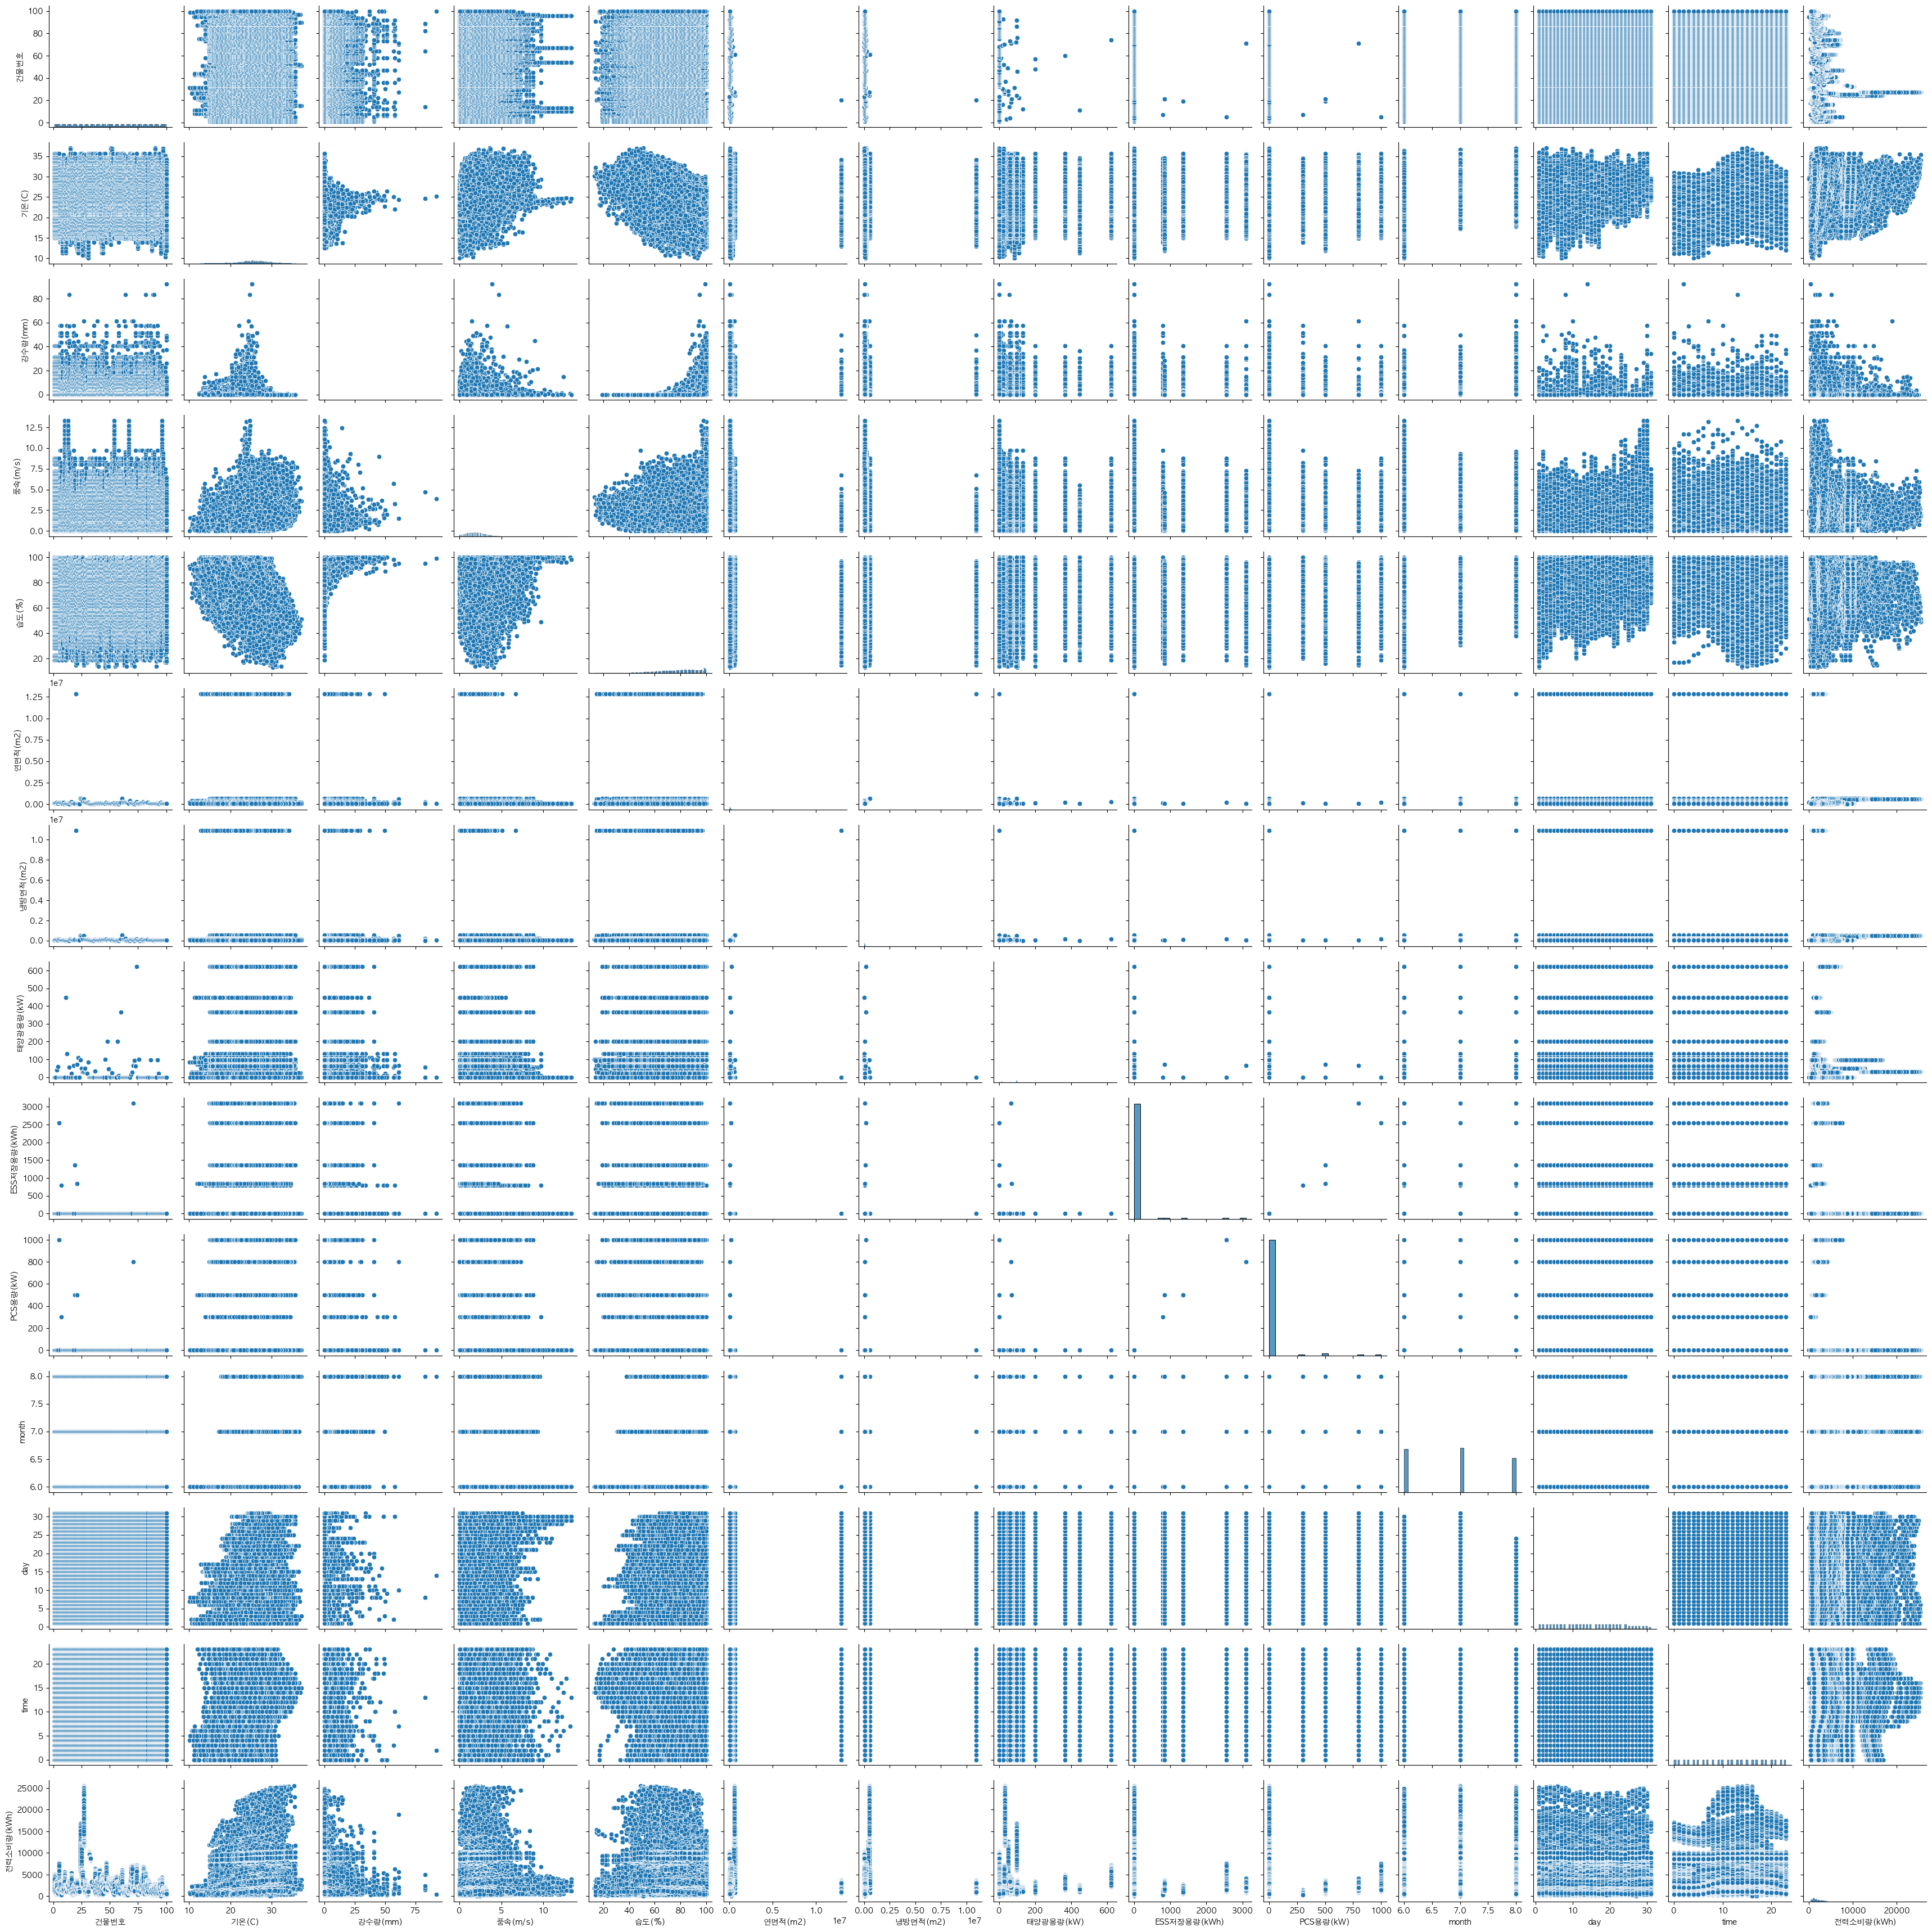

In [59]:
sns.pairplot(
    train
)